## 1. Basic Operators

- When x and y are scalars, the following standard operations are available

<img src="./img/7.png" width="600" height="600">

Remainder: %

## 2. Array Broadcasting

- When x and y are arrays, the behavior of mathematical operations is more complex.
- Under the normal rules of array mathematics, addition and subtraction are only defined for arrays with the same shape or between an array and a scalar.
- NumPy uses a technique called broadcasting to allow element-byelement mathematical operations on arrays which would not be compatible under the standard rules of array mathematics.
- Arrays can be used in element-by-element mathematics if x is broadcastable to y.
- Suppose $x$ is an $m$-dimensional array with dimensions $d=[d_1,d_2,...,d_m]$ and $y$ is an $n$-dimensional array with dimensions $f=[f_1,f_2,...,f_m]$ where $m\ge n$. Formally, two arrays are broadcastable if the following two conditions hold.
    - (1) If $m>n$, then treat $y$ as a $m$-dimensional array with size $g=[1,1,...,1,f_1,...,f_n]$ where the number of 1s prepended is $m-n$. The dimensions are $g_i=1$ for $f_i=1,..,m-n$ and $g_i = f_{i-m+n}$ for $i>m-n$.
        - $\rightarrow$ If one array has fewer dimensions, it is treated as having the same number of dimensions as the larger array by prepending 1s.
    - (2) For $i=1,...,m$, $\max{(d_i,g_i)}/\min{(d_i,g_i)} \in \left\{1, \max{(d_i,g_i)}\right\}$
        - $\rightarrow$ Arrays will only be broadcastable if either 
            - (a) they have the same dimension along axis $i$ or 
            - (b) one has dimension 1 along axis $i$.    
- Subject to broadcasting restrictions, standard operators operate element-by-element.

<img src="./img/8.png" width="600" height="600">


In [3]:
import numpy as np

x = np.array([[1,2,3]])
y = np.array([[0],[0],[0]])

print(x.shape)
print(y.shape)

print(x+y)

(1, 3)
(3, 1)
[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [6]:
x = np.reshape(np.arange(15),(3,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [13]:
y = 5
x+y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]], dtype=int32)

In [8]:
y = np.arange(5)
x+y

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13],
       [10, 12, 14, 16, 18]])

In [9]:
y = np.arange(3)
x+y

ValueError: operands could not be broadcast together with shapes (3,5) (3,) 

## 3. Matrix Multiplication

- The matrix multiplication operator $@$ was introduced in Python 3.5.
- It can only be used to two arrays and cannot be used to multiply an array and a scalar.
- If $x$ is $N$ by $M$ and $y$ is $K$ by $L$ and both are non-scalar matrices, $x @ y$ requires $M = K$.
- $x @ y$ is identical to $x$.dot($y$) or np.dot($x$, $y$).

In [15]:
x = np.array([[1.0, 2],[ 3, 2], [3, 4]])
y = np.array([[9.0, 8],[7, 6]]) 

x @ y

array([[23., 20.],
       [41., 36.],
       [55., 48.]])

In [16]:
x.dot(y)

array([[23., 20.],
       [41., 36.],
       [55., 48.]])

## 4. Transpose

- Matrix transpose is expressed using either .T or the transpose function.
- For instance, if $x$ is an $M$ by $N$ array, transpose($x$), $x$.transpose() and $x$.T are all its transpose with dimensions $N$ by $M$.

In [21]:
x = np.random.randn(2,2)
print(x)
x.T

[[ 0.87670244  0.97428885]
 [-0.24845496  0.69235853]]


array([[ 0.87670244, -0.24845496],
       [ 0.97428885,  0.69235853]])

## Example : Linear regression using the Normal Equation

In [22]:
import numpy as np

# generating pseudo data

X = 2 * np.random.randn(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

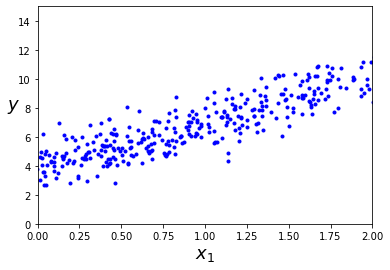

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Formula from normal equation :
$\hat{\beta}= (X'X)^{-1}X'y \left(\hat{\beta}_i = { \sum (x_i - \bar{x})y_i \over \sum (x_i - \bar{x})^2}\right)$

In [24]:
X_b = np.c_[np.ones((1000, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @X_b.T@y

In [25]:
theta_best

array([[4.03387109],
       [2.97772047]])

In [26]:
#predictions

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.03387109],
       [9.98931203]])

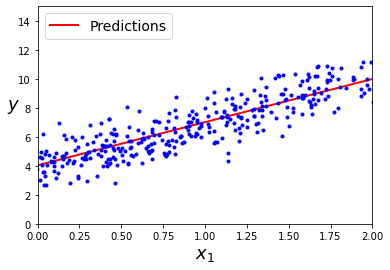

In [27]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

plt.show()